In [1]:
import numpy as np
import numpy.typing as nptyping
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Datasets

## `rings3_regular`

In [2]:
rings3_train = pd.read_csv('data/classification/rings3-regular-training.csv')
rings3_test = pd.read_csv('data/classification/rings3-regular-test.csv')

In [3]:
print(rings3_train.shape)
print(rings3_test.shape)

(1500, 3)
(2000, 3)


In [4]:
rings3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       1500 non-null   float64
 1   y       1500 non-null   float64
 2   c       1500 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 35.3 KB


In [5]:
rings3_train.describe()

,x,y,c
count,1500.000000,1500.000000,1500.000000
mean,-2.946603,-2.183721,1.000000
std,57.233821,58.092233,0.816769
min,-99.927071,-99.988277,0.000000
25%,-53.107905,-51.783417,0.000000
50%,0.397659,-3.196860,1.000000
75%,41.501284,45.925577,2.000000
max,99.932509,99.981993,2.000000


In [6]:
rings3_train['c'].value_counts()

0    500
1    500
2    500
Name: c, dtype: int64

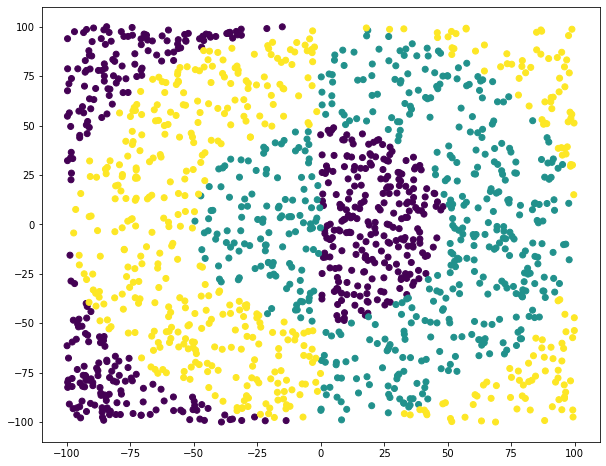

In [7]:
plt.figure(figsize=(10, 8))
plt.scatter(rings3_train['x'], rings3_train['y'], c=rings3_train['c'])
plt.show()

One-hot encode the target variable:

In [8]:
rings3_train['c0'] = rings3_train['c'].map(lambda x: 1 if x == 0 else 0)
rings3_train['c1'] = rings3_train['c'].map(lambda x: 1 if x == 1 else 0)
rings3_train['c2'] = rings3_train['c'].map(lambda x: 1 if x == 2 else 0)

rings3_test['c0'] = rings3_test['c'].map(lambda x: 1 if x == 0 else 0)
rings3_test['c1'] = rings3_test['c'].map(lambda x: 1 if x == 1 else 0)
rings3_test['c2'] = rings3_test['c'].map(lambda x: 1 if x == 2 else 0)

Convert data to column arrays to prevent errors when predicting:

In [9]:
x_rings3_train = rings3_train[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_rings3_train = rings3_train['c'].to_numpy().reshape((-1, 1))
yonehot_rings3_train = rings3_train[['c0', 'c1', 'c2']].to_numpy().reshape((-1, 3))

x_rings3_test = rings3_test[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_rings3_test = rings3_test['c'].to_numpy().reshape((-1, 1))
yonehot_rings3_test = rings3_test[['c0', 'c1', 'c2']].to_numpy().reshape((-1, 3))

## `easy`

In [10]:
easy_train = pd.read_csv('data/classification/easy-training.csv')
easy_test = pd.read_csv('data/classification/easy-test.csv')

In [11]:
print(easy_train.shape)
print(easy_test.shape)

(500, 3)
(500, 3)


In [12]:
easy_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   c       500 non-null    bool   
dtypes: bool(1), float64(2)
memory usage: 8.4 KB


In [13]:
easy_train['c'] = easy_train['c'].map(lambda b: 1 if b else 0)

In [14]:
easy_train.describe()

,x,y,c
count,500.000000,500.000000,500.000000
mean,-0.871759,-3.436275,0.500000
std,56.572253,58.050009,0.500501
min,-99.656089,-99.522566,0.000000
25%,-48.682651,-51.713643,0.000000
50%,-1.127437,-10.436352,0.500000
75%,46.870536,47.164266,1.000000
max,99.643227,99.952429,1.000000


In [15]:
easy_train['c'].value_counts()

0    250
1    250
Name: c, dtype: int64

In [16]:
def plot_approx_lines_easy():
    plt.plot([-100, 100], [-100, 100])

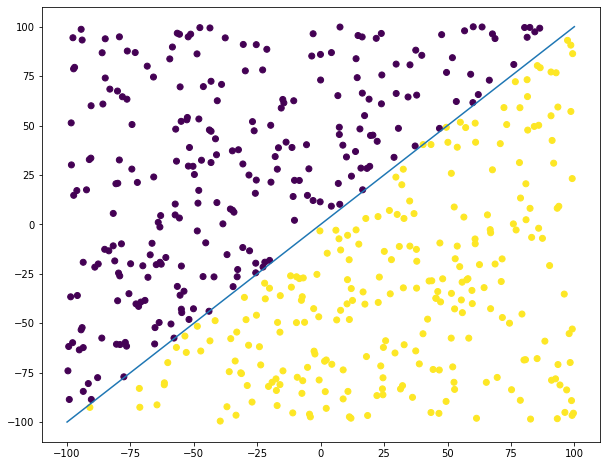

In [17]:
plt.figure(figsize=(10, 8))
plt.scatter(easy_train['x'], easy_train['y'], c=easy_train['c'])
plot_approx_lines_easy()
plt.show()

One-hot encode the target variable:

In [18]:
easy_train['c0'] = easy_train['c'].map(lambda x: 1 if x == 0 else 0)
easy_train['c1'] = easy_train['c'].map(lambda x: 1 if x == 1 else 0)

easy_test['c0'] = easy_test['c'].map(lambda x: 1 if x == 0 else 0)
easy_test['c1'] = easy_test['c'].map(lambda x: 1 if x == 1 else 0)

Convert data to column arrays to prevent errors when predicting:

In [19]:
x_easy_train = easy_train[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_easy_train = easy_train['c'].to_numpy().reshape((-1, 1))
yonehot_easy_train = easy_train[['c0', 'c1']].to_numpy().reshape((-1, 2))

x_easy_test = easy_test[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_easy_test = easy_test['c'].to_numpy().reshape((-1, 1))
yonehot_easy_test = easy_test[['c0', 'c1']].to_numpy().reshape((-1, 2))

## `xor3`

In [20]:
xor3_train = pd.read_csv('data/classification/xor3-training.csv')
xor3_test = pd.read_csv('data/classification/xor3-test.csv')

In [21]:
print(xor3_train.shape)
print(xor3_test.shape)

(500, 3)
(500, 3)


In [22]:
xor3_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       500 non-null    float64
 1   y       500 non-null    float64
 2   c       500 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 11.8 KB


In [23]:
xor3_train.describe()

,x,y,c
count,500.000000,500.000000,500.000000
mean,0.210959,3.299145,0.500000
std,56.997479,58.260170,0.500501
min,-99.926179,-99.273930,0.000000
25%,-48.910769,-49.020768,0.000000
50%,-3.339158,1.270354,0.500000
75%,49.593795,55.773209,1.000000
max,99.887885,99.682576,1.000000


In [24]:
xor3_train['c'].value_counts()

0    250
1    250
Name: c, dtype: int64

In [25]:
def plot_approx_lines_xor3():
    plt.plot([[-100, -100, -33.33, 33.33], [100, 100, -33.33, 33.33]], [[-33.33, 33.33, -100, -100], [-33.33, 33.33, 100, 100]], 'r')

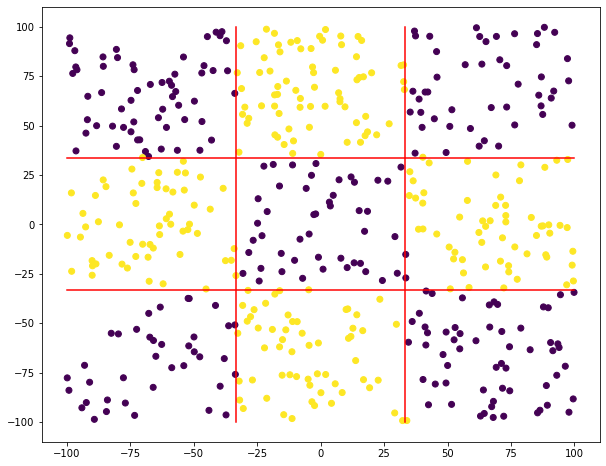

In [26]:
plt.figure(figsize=(10, 8))
plt.scatter(xor3_train['x'], xor3_train['y'], c=xor3_train['c'])
plot_approx_lines_xor3()
plt.show()

One-hot encode the target variable:

In [27]:
xor3_train['c0'] = xor3_train['c'].map(lambda x: 1 if x == 0 else 0)
xor3_train['c1'] = xor3_train['c'].map(lambda x: 1 if x == 1 else 0)

xor3_test['c0'] = xor3_test['c'].map(lambda x: 1 if x == 0 else 0)
xor3_test['c1'] = xor3_test['c'].map(lambda x: 1 if x == 1 else 0)

Convert data to column arrays to prevent errors when predicting:

In [28]:
x_xor3_train = xor3_train[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_xor3_train = xor3_train['c'].to_numpy().reshape((-1, 1))
yonehot_xor3_train = xor3_train[['c0', 'c1']].to_numpy().reshape((-1, 2))

x_xor3_test = xor3_test[['x', 'y']].to_numpy().reshape((-1, 2))
ylabels_xor3_test = xor3_test['c'].to_numpy().reshape((-1, 1))
yonehot_xor3_test = xor3_test[['c0', 'c1']].to_numpy().reshape((-1, 2))

# Utilities

In [29]:
from abc import ABC, abstractmethod

## Activation functions

In [30]:
class ActivationFunction(ABC):

    @abstractmethod
    def val(self, x: nptyping.NDArray) -> nptyping.NDArray:
        pass

    @abstractmethod
    def deriv(self, x: nptyping.NDArray) -> nptyping.NDArray:
        pass

### Sigmoid activation function

In [31]:
class SigmoidActivation(ActivationFunction):

    def val(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return 1 / (np.exp(-x) + 1)
    
    def deriv(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return self.val(x) * (1 - self.val(x))

### Linear activation function

In [32]:
class LinearActivation(ActivationFunction):

    def val(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return x
    
    def deriv(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return np.ones(x.shape)

### Softmax activation function

In [33]:
class SoftmaxActivation(ActivationFunction):

    def val(self, x: nptyping.NDArray) -> nptyping.NDArray:
        exp = np.exp(x)
        return exp / np.sum(exp, axis=1).reshape(-1, 1)
    
    def deriv(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return np.ones(x.shape)  # it works with cross-entropy

## Loss functions

In [34]:
class LossFunction(ABC):

    @abstractmethod
    def val(self, y_true: nptyping.NDArray, y_pred: nptyping.NDArray) -> float:
        pass

### Mean squared error

In [35]:
class MSE(LossFunction):

    def val(self, y_true: nptyping.NDArray, y_pred: nptyping.NDArray) -> float:
        n = len(y_true)
        return (1/n) * np.sum((y_true - y_pred)**2)

### Cross-entropy

In [36]:
class CrossEntropy(LossFunction):

    eps = 10 ** (-100)

    def val(self, y_true: nptyping.NDArray, y_pred: nptyping.NDArray) -> float:
        return -np.sum(y_true * np.log(y_pred + self.eps))

# MLP implementation

In [37]:
from numpy.random import Generator, PCG64
from typing import Callable

In [38]:
class MLP:
    __slots__ = ['input_size', 'output_size', 'hidden_layers_sizes', 'weights', 'biases', 'activation_func', 'out_func', 
                 'loss', '__normalise_max_x', '__normalise_min_x', '__normalise_max_y', '__normalise_min_y']

    def __init__(self, input_size: int, hidden_layers_sizes: list[int], output_size: int, 
                 activation_func: ActivationFunction, out_func: ActivationFunction, loss: LossFunction):
        self.input_size = input_size
        self.hidden_layers_sizes = hidden_layers_sizes
        self.output_size = output_size
        self.activation_func = activation_func
        self.out_func = out_func
        self.loss = loss
        self.__set_default_weights()
    
    def __set_default_weights(self, rng: Generator = None):
        self.weights = []
        self.biases = []

        if rng is None:
            rng = Generator(PCG64())

        # default weigths are taken from normal distribution
        layers_sizes = [self.input_size, *self.hidden_layers_sizes, self.output_size]
        for i in range(len(layers_sizes) - 1):
            self.weights.append(
                rng.uniform(size=(layers_sizes[i], layers_sizes[i + 1]))
            )
        # default biases are 0
        for layer_size in layers_sizes[1:]:
            self.biases.append(
                np.zeros((1, layer_size))
            )

    @property
    def layers_count(self) -> int:
        return len(self.weights) + 1
    
    def visualise(self, nrow: int = None, ncol: int = None, annotate: bool = True):
        if ncol is None and nrow is None:
            nrow = 1
            ncol = self.layers_count - 1
        elif ncol is None:
            ncol = int(np.ceil((self.layers_count - 1) / nrow))
        elif nrow is None:
            nrow = int(np.ceil((self.layers_count - 1) / ncol))

        for i, weights, biases in zip(range(self.layers_count - 1), self.weights, self.biases):
            # concatenating weights & biases
            weights = weights.reshape(len(biases[0]), -1)
            biases = biases.reshape(-1, 1)
            layer = np.concatenate([weights, biases], axis=1)

            # plotting layer values on a heatmap
            plt.subplot(nrow, ncol, i + 1)
            sns.heatmap(layer, cmap='BrBG', annot=annotate)
            plot_title = f'{i} -> {i + 1}'
            if i == 0:
                plot_title = 'Input -> 1'
            elif i == self.layers_count - 2:
                plot_title = f'{i} -> Output'
            plt.title(plot_title)
        plt.show()

    def __normalise_x(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return (x - self.__normalise_min_x) / (self.__normalise_max_x - self.__normalise_min_x)
    
    def __normalise_y(self, y: nptyping.NDArray) -> nptyping.NDArray:
        return (y - self.__normalise_min_y) / (self.__normalise_max_y - self.__normalise_min_y)

    def __denormalise_x(self, x: nptyping.NDArray) -> nptyping.NDArray:
        return x * (self.__normalise_max_x - self.__normalise_min_x) + self.__normalise_min_x

    def __denormalise_y(self, y: nptyping.NDArray) -> nptyping.NDArray:
        return y * (self.__normalise_max_y - self.__normalise_min_y) + self.__normalise_min_y

    def __get_rng(self, seed: int | str | None) -> Generator:
        if seed is not None:
            if type(seed) is str:
                seed = np.sum([ord(c) for c in seed])
            rng = Generator(PCG64(seed))
        else:
            rng = Generator(PCG64())
        return rng
    
    def __generate_batches(self, x: nptyping.NDArray, y: nptyping.NDArray, batch_size: int, rng: Generator) -> list[tuple[nptyping.NDArray, nptyping.NDArray]]:
        data_size = y.shape[0]
        # shuffle x & y
        indices = np.arange(data_size)
        rng.shuffle(indices)
        x = x[indices]
        y = y[indices]
        # generate batches
        split_points = np.arange(batch_size, data_size, batch_size)
        x_batches = np.array_split(x, split_points)
        y_batches = np.array_split(y, split_points)
        return x_batches, y_batches
    
    def __handle_verbosity(self, verbosity_period: int, epoch: int, total_epochs: int,
                           x_train_pre_norm: nptyping.NDArray, y_train_pre_norm: nptyping.NDArray, 
                           x_test: nptyping.NDArray, y_test: nptyping.NDArray):
        # printing the progress every [verbosity_period]th epoch, unless verbosity_period is set to 0
        if verbosity_period > 0 and (epoch + 1) % verbosity_period == 0:

            loss_train = self.loss.val(y_train_pre_norm, self.predict(x_train_pre_norm))
            text = f'Epoch {epoch + 1}/{total_epochs} done | loss(train) = {loss_train:.2f}'

            if x_test is not None and y_test is not None:
                loss_test = self.loss.val(y_test, self.predict(x_test))
                text += f' | loss(test) = {loss_test:.2f}'
            print(text)
    
    def __feedforward(self, x: nptyping.NDArray) -> tuple[list[nptyping.NDArray], list[nptyping.NDArray]]:
        """
        Computes and returns the values in every layer from before and after activation

        :return: A two-element tuple, where the first element is a list of values before activation,
                 and the second is a list of values after activation
        """
        prev_a = x
        z = []
        a = [x]

        for weights, biases in zip(self.weights[:-1], self.biases[:-1]):
            z_k = (prev_a @ weights) + biases
            z.append(z_k)
            prev_a = self.activation_func.val(z_k)
            a.append(prev_a)
        # the last iteration uses a different activation function
        z_k = (prev_a @ self.weights[-1]) + self.biases[-1]
        z.append(z_k)
        prev_a = self.out_func.val(z_k)
        a.append(prev_a)
        return z, a
    
    def __backpropagate(self, y: nptyping.NDArray, 
                        z: list[nptyping.NDArray], 
                        a: list[nptyping.NDArray]) -> tuple[list[nptyping.NDArray], list[nptyping.NDArray]]:
        """
        Performs backpropagation and returns weights and biases deltas

        :param z: values before activation
        :param a: values after activation
        :return: A tuple, where the first element is the weights_delta and the second one is the biases_delta
        """
        # initialise deltas to 0
        weights_delta = [np.zeros(w.shape) for w in self.weights]
        biases_delta = [np.zeros(b.shape) for b in self.biases]

        y_pred = a[-1]
        e_k = (y_pred - y) * self.out_func.deriv(z[-1])
        weights_delta[-1] = a[-2].T @ e_k
        biases_delta[-1] = e_k.sum(axis=0)
        
        for k in range(2, self.layers_count):
            e_k = self.activation_func.deriv(z[-k]) * (self.weights[-k+1] @ e_k.T).T
            weights_delta[-k] = a[-k-1].T @ e_k
            biases_delta[-k] = e_k.sum(axis=0)

        return weights_delta, biases_delta
    
    def __summarise_training(self, loss_history: list[float], plot_loss: bool):
        min_loss = np.min(loss_history)
        min_loss_epoch = loss_history.index(min_loss)
        print(f'Minimal train loss: {min_loss:.2f} (epoch {min_loss_epoch})')
        print(f'Final train loss: {loss_history[-1]:.2f}')
        
        if plot_loss:
            plt.figure(figsize=(10, 8))
            plt.plot(list(range(len(loss_history))), loss_history)
            plt.yscale('log')
            plt.ylabel('Loss')
            plt.xlabel('Epoch')
            plt.show()           
    
    def __gradient_descent_basic(self, x_norm: nptyping.NDArray, y_norm: nptyping.NDArray, x_test: nptyping.NDArray, y_test: nptyping.NDArray,
                                 epochs: int, learning_rate: float | Callable, batch_size: int, 
                                 verbosity_period: int, rng: Generator) -> list[float]:
        """
        :return: loss values on the training dataset after every epoch
        """
        x_pre_norm = self.__denormalise_x(x_norm)
        y_pre_norm = self.__denormalise_y(y_norm)

        # train loss after every epoch
        loss_history = [self.loss.val(y_pre_norm, self.predict(x_pre_norm))]

        # adjusting weights & biases using backpropagation
        for epoch in range(epochs):
            # set the learning rate
            if type(learning_rate) is float or type(learning_rate) is int:
                lr = learning_rate
            else:
                lr = learning_rate(epoch)
            
            # generate batches
            x_batches, y_batches = self.__generate_batches(x_norm, y_norm, batch_size, rng)

            # iterate over batches
            for x, y in zip(x_batches, y_batches):
                # FeedForward
                # z - values before activation
                # a - values after activation
                z, a = self.__feedforward(x)

                # Backpropagate
                weights_delta, biases_delta = self.__backpropagate(y, z, a)

                # updating weights
                self.weights = [w - lr * delta / len(y)
                                for w, delta in zip(self.weights, weights_delta)]
                self.biases = [b - lr * delta / len(y)
                               for b, delta in zip(self.biases, biases_delta)]

            # saving loss
            loss_history.append(self.loss.val(y_pre_norm, self.predict(x_pre_norm)))
            
            # printing the progress
            self.__handle_verbosity(verbosity_period=verbosity_period, epoch=epoch, total_epochs=epochs,
                                    x_train_pre_norm=x_pre_norm, y_train_pre_norm=y_pre_norm, 
                                    x_test=x_test, y_test=y_test)
        return loss_history

    def __gradient_descent_momentum(self, x_norm: nptyping.NDArray, y_norm: nptyping.NDArray, x_test: nptyping.NDArray, y_test: nptyping.NDArray,
                                    epochs: int, learning_rate: float | Callable, batch_size: int, lambda_coef: float, 
                                    verbosity_period: int, rng: Generator) -> list[float]:
        """
        :return: loss values on the training dataset after every epoch
        """
        x_pre_norm = self.__denormalise_x(x_norm)
        y_pre_norm = self.__denormalise_y(y_norm)

        # train loss after every epoch
        loss_history = [self.loss.val(y_pre_norm, self.predict(x_pre_norm))]

        # momentum
        momentum_weights = [np.zeros(w.shape) for w in self.weights]
        momentum_biases = [np.zeros(b.shape) for b in self.biases]

        # adjusting weights & biases using backpropagation
        for epoch in range(epochs):
            # set the learning rate
            if type(learning_rate) is float or type(learning_rate) is int:
                lr = learning_rate
            else:
                lr = learning_rate(epoch)
            
            # generate batches
            x_batches, y_batches = self.__generate_batches(x_norm, y_norm, batch_size, rng)

            # iterate over batches
            for x, y in zip(x_batches, y_batches):
                # FeedForward
                # z - values before activation
                # a - values after activation
                z, a = self.__feedforward(x)

                # Backpropagate
                weights_delta, biases_delta = self.__backpropagate(y, z, a)

                # updating momentum
                momentum_weights = [w - lambda_coef * momentum
                                    for w, momentum in zip(weights_delta, momentum_weights)]
                momentum_biases = [b - lambda_coef * momentum
                                for b, momentum in zip(biases_delta, momentum_biases)]
                # updating weights
                self.weights = [w - lr * momentum / len(y)
                                for w, momentum in zip(self.weights, weights_delta)]
                self.biases = [b - lr * momentum / len(y)
                               for b, momentum in zip(self.biases, biases_delta)]

            # saving loss
            loss_history.append(self.loss.val(y_pre_norm, self.predict(x_pre_norm)))

            # printing the progress
            self.__handle_verbosity(verbosity_period=verbosity_period, epoch=epoch, total_epochs=epochs,
                                    x_train_pre_norm=x_pre_norm, y_train_pre_norm=y_pre_norm, 
                                    x_test=x_test, y_test=y_test)
        return loss_history

    def __rmsprop(self, x_norm: nptyping.NDArray, y_norm: nptyping.NDArray, x_test: nptyping.NDArray, y_test: nptyping.NDArray,
                  epochs: int, learning_rate: float | Callable, batch_size: int, beta_coef: float, 
                  verbosity_period: int, rng: Generator) -> list[float]:
        """
        :return: loss values on the training dataset after every epoch
        """
        x_pre_norm = self.__denormalise_x(x_norm)
        y_pre_norm = self.__denormalise_y(y_norm)

        # train loss after every epoch
        loss_history = [self.loss.val(y_pre_norm, self.predict(x_pre_norm))]

        # E[g^2]
        eg2_weights = [np.zeros(w.shape) for w in self.weights]
        eg2_biases = [np.zeros(b.shape) for b in self.biases]

        # adjusting weights & biases using backpropagation
        for epoch in range(epochs):
            # set the learning rate
            if type(learning_rate) is float or type(learning_rate) is int:
                lr = learning_rate
            else:
                lr = learning_rate(epoch)

            # generate batches
            x_batches, y_batches = self.__generate_batches(x_norm, y_norm, batch_size, rng)

            # iterate over batches
            for x, y in zip(x_batches, y_batches):
                # FeedForward
                # z - values before activation
                # a - values after activation
                z, a = self.__feedforward(x)

                # Backpropagate
                g_weights, g_biases = self.__backpropagate(y, z, a)

                # updating E[g^2]
                eg2_weights = [beta_coef * eg2 + (1 - beta_coef) * g**2
                            for eg2, g in zip(eg2_weights, g_weights)]
                eg2_biases = [beta_coef * eg2 + (1 - beta_coef) * g**2
                            for eg2, g in zip(eg2_biases, g_biases)]
                
                # updating weights
                self.weights = [w - lr * (g / np.sqrt(eg2)) / len(y)
                                for w, g, eg2 in zip(self.weights, g_weights, eg2_weights)]
                self.biases = [b - lr * (g / np.sqrt(eg2)) / len(y)
                               for b, g, eg2 in zip(self.biases, g_biases, eg2_biases)]

            # saving loss
            loss_history.append(self.loss.val(y_pre_norm, self.predict(x_pre_norm)))
            
            # printing the progress
            self.__handle_verbosity(verbosity_period=verbosity_period, epoch=epoch, total_epochs=epochs,
                                    x_train_pre_norm=x_pre_norm, y_train_pre_norm=y_pre_norm, 
                                    x_test=x_test, y_test=y_test)
        return loss_history
    
    def train(self, x_train: nptyping.NDArray, y_train: nptyping.NDArray, 
              x_test: nptyping.NDArray = None, y_test: nptyping.NDArray = None, method='basic',
              epochs: int = 1000, learning_rate: float | Callable = 0.001, 
              batch_size: int = 1, momentum_coef: float = 0.9, rmsprop_coef: float = 0.9,
              plot_loss: bool = False, random_state: int | None = None, verbosity_period: int = 0) -> list[float]:
        """
        Attempts to find optimal weights & biases for the network

        :param method:                 a method used to find the optimal weights. Accepted values: 'basic' (basic gradient descent),
                                       'momentum' (gradient descent with momentum), 'rmsprop'.
        :param learning_rate:          a learning rate coefficient. Can be either a number or a function that takes the epoch 
                                       number as an argument and returns a float
        :param momentum_coef:          a lambda coefficient for the gradient descent with momentum algorithm. Ignored unless the method
                                       parameter is set to 'momentum'
        :param rmsprop_coef:           a beta coefficient for the RMSProp algorithm. Ignored unless the method parameter is set to 'rmsprop'
        :param random_state:           a seed passed to a random number generation (affects the randomness of generating batches and 
                                       setting initial weights & biases)
        :param plot_loss:              whether to plot loss function values per epoch after the training
        :param verbosity_period:       controls how often loss values are printed. If verbosity_period = n, then the progress will be printed
                                       every nth epoch. If verbosity_period = 0, then nothing will be printed.

        :return:                       loss values after every epoch
        """
        # random_state for reproducibility
        rng = self.__get_rng(random_state)
        
        # reset weights
        self.__set_default_weights(rng)

        # normalisation
        self.__normalise_max_x = np.max(x_train)
        self.__normalise_min_x = np.min(x_train)
        self.__normalise_max_y = np.max(y_train)
        self.__normalise_min_y = np.min(y_train)
        x_norm = self.__normalise_x(x_train)
        y_norm = self.__normalise_y(y_train)

        # finding the best weights & biases
        if method == 'basic':
            loss_history = self.__gradient_descent_basic(
                x_norm=x_norm, y_norm=y_norm, x_test=x_test, y_test=y_test,
                epochs=epochs, learning_rate=learning_rate,
                batch_size=batch_size, 
                verbosity_period=verbosity_period, rng=rng,
            )
        elif method == 'momentum':
            loss_history = self.__gradient_descent_momentum(
                x_norm=x_norm, y_norm=y_norm, x_test=x_test, y_test=y_test,
                epochs=epochs, learning_rate=learning_rate,
                batch_size=batch_size, lambda_coef=momentum_coef, 
                verbosity_period=verbosity_period, rng=rng,
            )
        elif method == 'rmsprop':
            loss_history = self.__rmsprop(
                x_norm=x_norm, y_norm=y_norm, x_test=x_test, y_test=y_test,
                epochs=epochs, learning_rate=learning_rate,
                batch_size=batch_size, beta_coef=rmsprop_coef, 
                verbosity_period=verbosity_period, rng=rng,
            )
        else:
            raise ValueError('Wrong value for the method parameter. Possible values: "basic", "momentum", "rmsprop"')

        # summary
        self.__summarise_training(loss_history, plot_loss)
        return loss_history

    def predict(self, x: nptyping.NDArray, convert_prob_to_labels: bool = False) -> nptyping.NDArray:
        # normalisation
        x = self.__normalise_x(x)

        # prediction
        _, activations = self.__feedforward(x)
        y = activations[-1]

        # denormalisation
        y = self.__denormalise_y(y)

        if convert_prob_to_labels:
            y = np.argmax(y, axis=1).reshape(-1, 1)

        return y

# Models training

In [39]:
from sklearn.metrics import f1_score

## `easy`

### Softmax

In [40]:
mlp_easy_softmax = MLP(2, [5], 2, 
                       activation_func=SigmoidActivation(),
                       out_func=SoftmaxActivation(),
                       loss=CrossEntropy())

Epoch 1000/3000 done | loss(train) = 76.33 | loss(test) = 74.82
Epoch 2000/3000 done | loss(train) = 45.46 | loss(test) = 44.35
Epoch 3000/3000 done | loss(train) = 34.98 | loss(test) = 34.21
Minimal train loss: 34.98 (epoch 3000)
Final train loss: 34.98


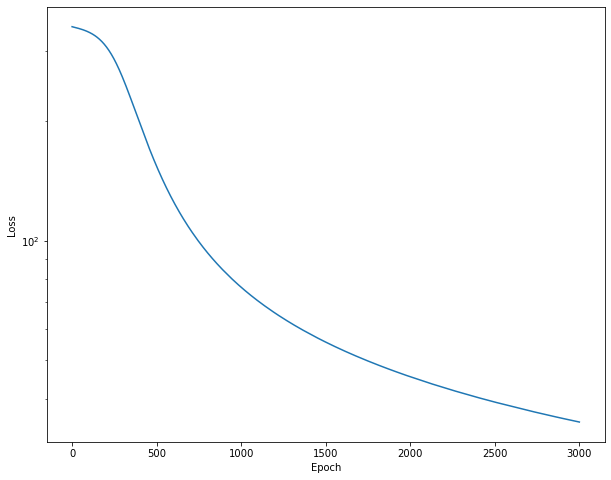

In [41]:
mlp_easy_softmax.train(
    x_easy_train, yonehot_easy_train, method='momentum',
    x_test=x_easy_test, y_test=yonehot_easy_test,
    epochs=3000, learning_rate=0.01, batch_size=32, momentum_coef=0.9,
    plot_loss=True, random_state=33, verbosity_period=1000,
);

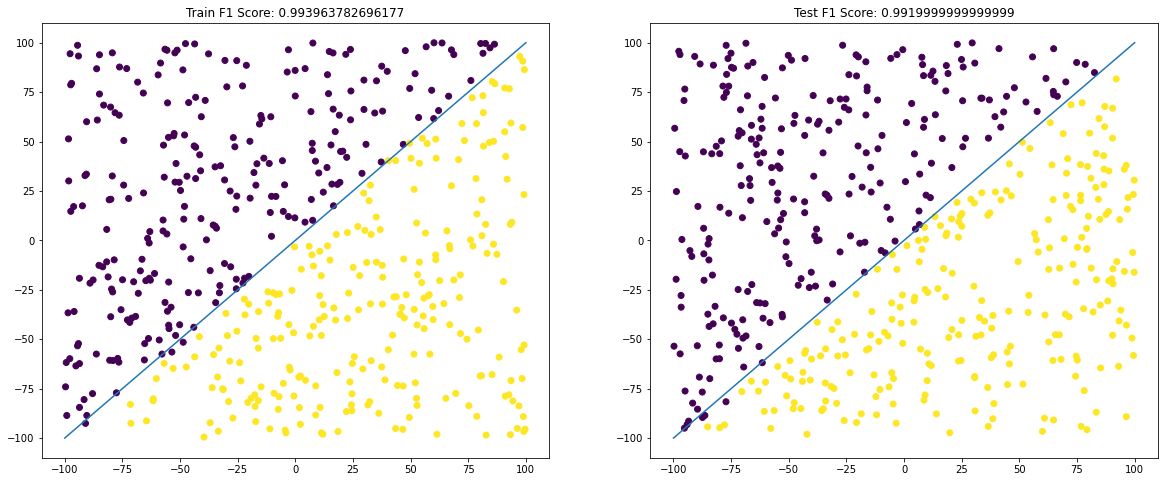

In [42]:
pred_labels_train = mlp_easy_softmax.predict(x_easy_train, convert_prob_to_labels=True)
pred_labels_test = mlp_easy_softmax.predict(x_easy_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_easy_train[:, 0], x_easy_train[:, 1], c=pred_labels_train)
plot_approx_lines_easy()
plt.title(f'Train F1 Score: {f1_score(ylabels_easy_train, pred_labels_train)}')

plt.subplot(1, 2, 2)
plt.scatter(x_easy_test[:, 0], x_easy_test[:, 1], c=pred_labels_test)
plot_approx_lines_easy()
plt.title(f'Test F1 Score: {f1_score(ylabels_easy_test, pred_labels_test)}')

plt.show()

### Linear

In [43]:
mlp_easy_linear = MLP(2, [5], 2, 
                      activation_func=SigmoidActivation(),
                      out_func=LinearActivation(),
                      loss=MSE())

Epoch 1000/3000 done | loss(train) = 0.16 | loss(test) = 0.16
Epoch 2000/3000 done | loss(train) = 0.16 | loss(test) = 0.15
Epoch 3000/3000 done | loss(train) = 0.15 | loss(test) = 0.15
Minimal train loss: 0.15 (epoch 3000)
Final train loss: 0.15


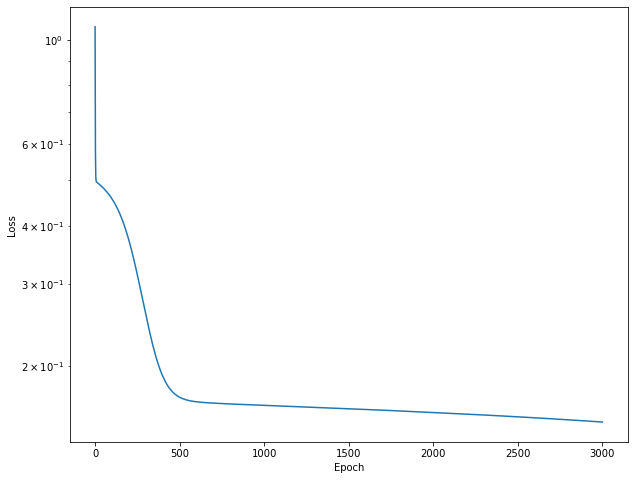

In [44]:
mlp_easy_linear.train(
    x_easy_train, yonehot_easy_train, method='momentum',
    x_test=x_easy_test, y_test=yonehot_easy_test,
    epochs=3000, learning_rate=0.01, batch_size=32, momentum_coef=0.9,
    plot_loss=True, random_state=33, verbosity_period=1000,
);

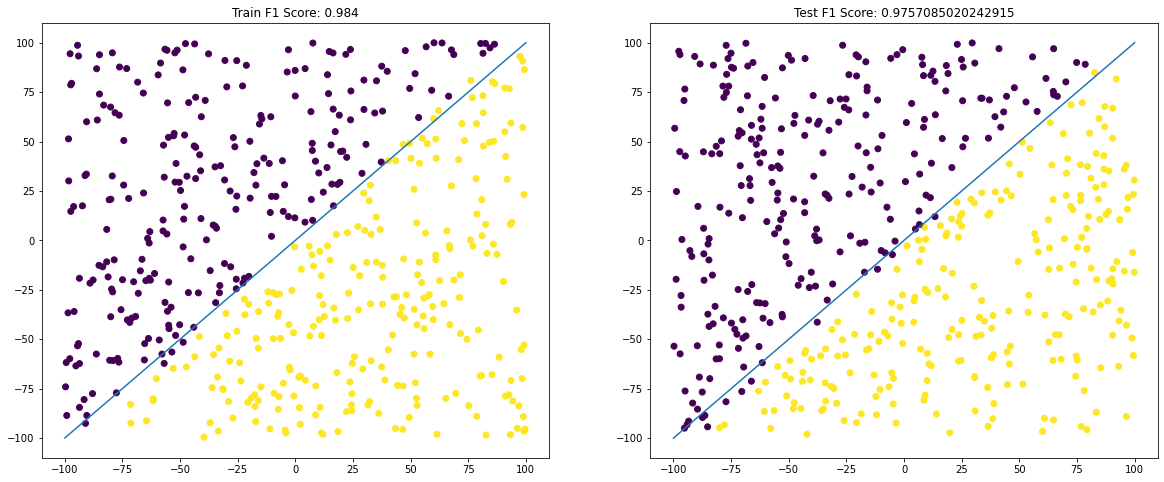

In [45]:
pred_labels_train = mlp_easy_linear.predict(x_easy_train, convert_prob_to_labels=True)
pred_labels_test = mlp_easy_linear.predict(x_easy_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_easy_train[:, 0], x_easy_train[:, 1], c=pred_labels_train)
plot_approx_lines_easy()
plt.title(f'Train F1 Score: {f1_score(ylabels_easy_train, pred_labels_train)}')

plt.subplot(1, 2, 2)
plt.scatter(x_easy_test[:, 0], x_easy_test[:, 1], c=pred_labels_test)
plot_approx_lines_easy()
plt.title(f'Test F1 Score: {f1_score(ylabels_easy_test, pred_labels_test)}')

plt.show()

## `xor3`

### Softmax

In [46]:
mlp_xor3_softmax = MLP(2, [5, 5], 2, 
                       activation_func=SigmoidActivation(),
                       out_func=SoftmaxActivation(),
                       loss=CrossEntropy())

In [47]:
def decaying_lr(epoch: int) -> float:
    if epoch < 7000:
        return 0.2
    else:
        return 0.05

Epoch 1000/200000 done | loss(train) = 346.31 | loss(test) = 345.89
Epoch 2000/200000 done | loss(train) = 340.68 | loss(test) = 337.60
Epoch 3000/200000 done | loss(train) = 273.17 | loss(test) = 271.69
Epoch 4000/200000 done | loss(train) = 76.99 | loss(test) = 100.59
Epoch 5000/200000 done | loss(train) = 50.58 | loss(test) = 70.18
Epoch 6000/200000 done | loss(train) = 34.46 | loss(test) = 47.12
Epoch 7000/200000 done | loss(train) = 36.92 | loss(test) = 65.00
Epoch 8000/200000 done | loss(train) = 21.18 | loss(test) = 39.69
Epoch 9000/200000 done | loss(train) = 19.94 | loss(test) = 37.71
Epoch 10000/200000 done | loss(train) = 19.05 | loss(test) = 38.42
Epoch 11000/200000 done | loss(train) = 19.20 | loss(test) = 42.75
Epoch 12000/200000 done | loss(train) = 17.77 | loss(test) = 40.87
Epoch 13000/200000 done | loss(train) = 16.89 | loss(test) = 35.26
Epoch 14000/200000 done | loss(train) = 16.06 | loss(test) = 39.54
Epoch 15000/200000 done | loss(train) = 15.91 | loss(test) = 35.

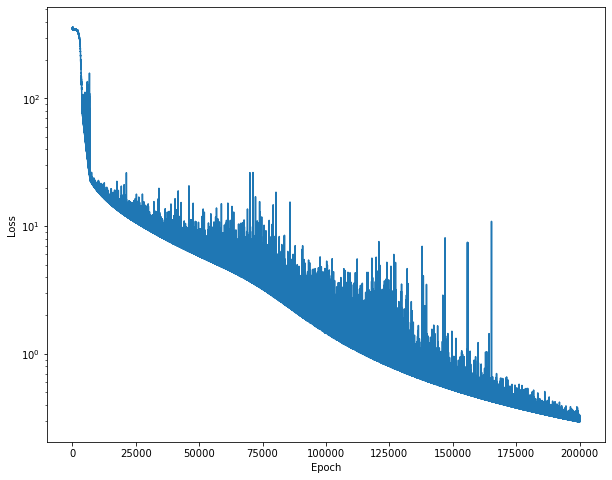

In [48]:
mlp_xor3_softmax.train(
    x_xor3_train, yonehot_xor3_train, method='momentum',
    x_test=x_xor3_test, y_test=yonehot_xor3_test,
    epochs=200_000, learning_rate=decaying_lr, batch_size=32, momentum_coef=0.9,
    plot_loss=True, random_state=28, verbosity_period=1000,
);

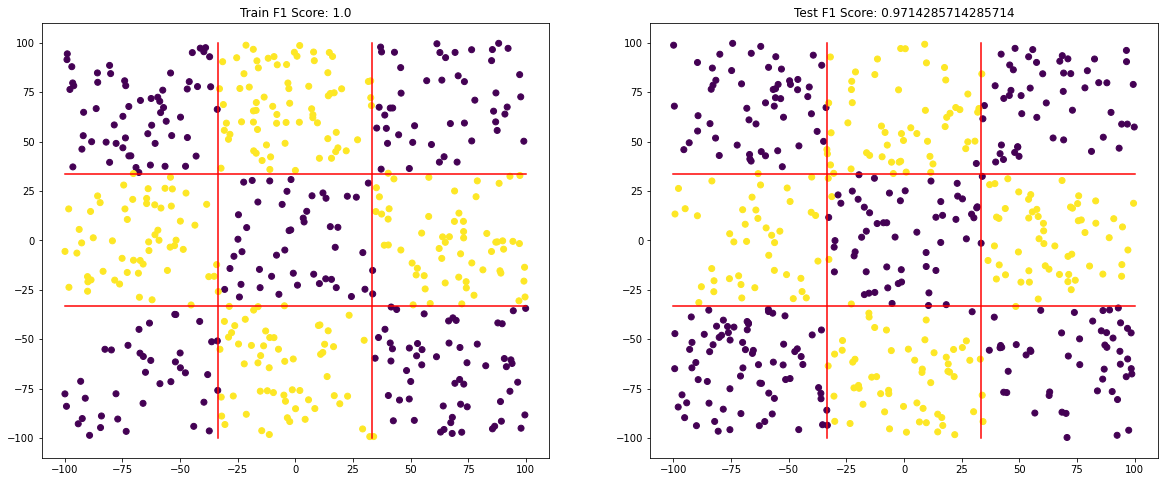

In [49]:
pred_labels_train = mlp_xor3_softmax.predict(x_xor3_train, convert_prob_to_labels=True)
pred_labels_test = mlp_xor3_softmax.predict(x_xor3_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_xor3_train[:, 0], x_xor3_train[:, 1], c=pred_labels_train)
plot_approx_lines_xor3()
plt.title(f'Train F1 Score: {f1_score(ylabels_xor3_train, pred_labels_train)}')

plt.subplot(1, 2, 2)
plt.scatter(x_xor3_test[:, 0], x_xor3_test[:, 1], c=pred_labels_test)
plot_approx_lines_xor3()
plt.title(f'Test F1 Score: {f1_score(ylabels_xor3_test, pred_labels_test)}')

plt.show()

### Linear

In [50]:
mlp_xor3_linear = MLP(2, [5, 5], 2, 
                      activation_func=SigmoidActivation(),
                      out_func=LinearActivation(),
                      loss=MSE())

In [51]:
def decaying_lr(epoch: int) -> float:
    if epoch < 7000:
        return 0.2
    else:
        return 0.05

Epoch 1000/200000 done | loss(train) = 0.50 | loss(test) = 0.50
Epoch 2000/200000 done | loss(train) = 0.51 | loss(test) = 0.49
Epoch 3000/200000 done | loss(train) = 0.50 | loss(test) = 0.49
Epoch 4000/200000 done | loss(train) = 0.46 | loss(test) = 0.49
Epoch 5000/200000 done | loss(train) = 0.44 | loss(test) = 0.44
Epoch 6000/200000 done | loss(train) = 0.43 | loss(test) = 0.40
Epoch 7000/200000 done | loss(train) = 0.30 | loss(test) = 0.30
Epoch 8000/200000 done | loss(train) = 0.27 | loss(test) = 0.30
Epoch 9000/200000 done | loss(train) = 0.27 | loss(test) = 0.29
Epoch 10000/200000 done | loss(train) = 0.26 | loss(test) = 0.30
Epoch 11000/200000 done | loss(train) = 0.25 | loss(test) = 0.29
Epoch 12000/200000 done | loss(train) = 0.25 | loss(test) = 0.28
Epoch 13000/200000 done | loss(train) = 0.25 | loss(test) = 0.27
Epoch 14000/200000 done | loss(train) = 0.24 | loss(test) = 0.27
Epoch 15000/200000 done | loss(train) = 0.24 | loss(test) = 0.28
Epoch 16000/200000 done | loss(tra

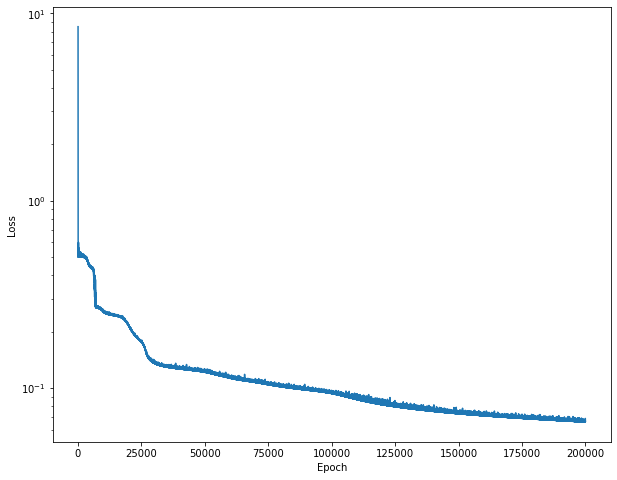

In [52]:
mlp_xor3_linear.train(
    x_xor3_train, yonehot_xor3_train, method='momentum',
    x_test=x_xor3_test, y_test=yonehot_xor3_test,
    epochs=200_000, learning_rate=decaying_lr, batch_size=32, momentum_coef=0.9,
    plot_loss=True, random_state=28, verbosity_period=1000,
);

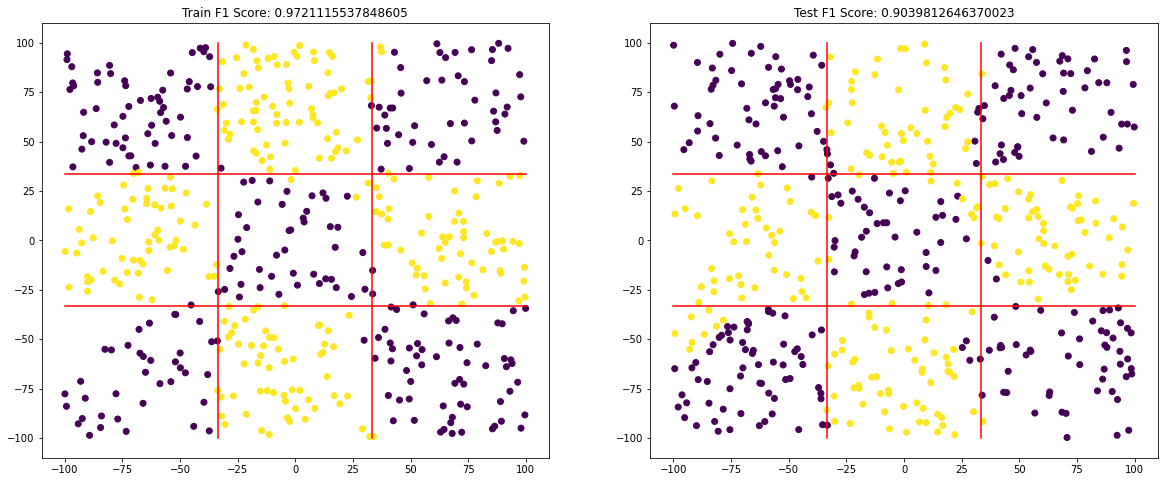

In [53]:
pred_labels_train = mlp_xor3_linear.predict(x_xor3_train, convert_prob_to_labels=True)
pred_labels_test = mlp_xor3_linear.predict(x_xor3_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_xor3_train[:, 0], x_xor3_train[:, 1], c=pred_labels_train)
plot_approx_lines_xor3()
plt.title(f'Train F1 Score: {f1_score(ylabels_xor3_train, pred_labels_train)}')

plt.subplot(1, 2, 2)
plt.scatter(x_xor3_test[:, 0], x_xor3_test[:, 1], c=pred_labels_test)
plot_approx_lines_xor3()
plt.title(f'Test F1 Score: {f1_score(ylabels_xor3_test, pred_labels_test)}')

plt.show()

## `rings3`

### Softmax

In [54]:
mlp_rings3_softmax = MLP(2, [20], 3, 
                         activation_func=SigmoidActivation(),
                         out_func=SoftmaxActivation(),
                         loss=CrossEntropy())

Epoch 500/10000 done | loss(train) = 1400.76 | loss(test) = 1782.73
Epoch 1000/10000 done | loss(train) = 686.61 | loss(test) = 909.64
Epoch 1500/10000 done | loss(train) = 513.15 | loss(test) = 701.91
Epoch 2000/10000 done | loss(train) = 407.26 | loss(test) = 583.41
Epoch 2500/10000 done | loss(train) = 347.67 | loss(test) = 514.44
Epoch 3000/10000 done | loss(train) = 306.96 | loss(test) = 438.30
Epoch 3500/10000 done | loss(train) = 276.15 | loss(test) = 415.86
Epoch 4000/10000 done | loss(train) = 255.06 | loss(test) = 391.00
Epoch 4500/10000 done | loss(train) = 238.96 | loss(test) = 378.44
Epoch 5000/10000 done | loss(train) = 223.93 | loss(test) = 354.68
Epoch 5500/10000 done | loss(train) = 212.46 | loss(test) = 336.88
Epoch 6000/10000 done | loss(train) = 203.79 | loss(test) = 331.16
Epoch 6500/10000 done | loss(train) = 197.54 | loss(test) = 322.61
Epoch 7000/10000 done | loss(train) = 190.26 | loss(test) = 324.98
Epoch 7500/10000 done | loss(train) = 185.75 | loss(test) = 3

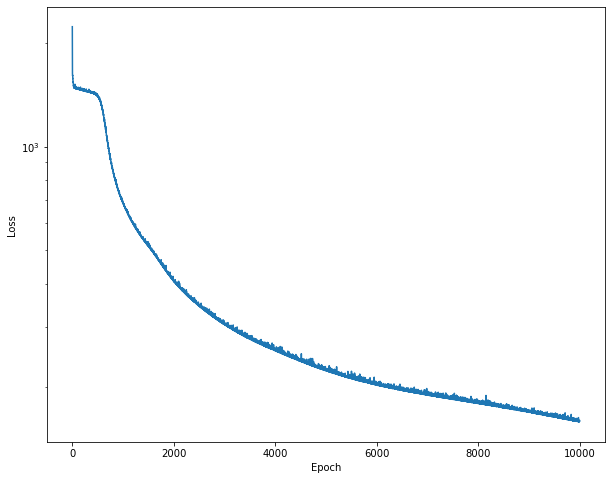

In [55]:
mlp_rings3_softmax.train(
    x_rings3_train, yonehot_rings3_train, method='basic',
    x_test=x_rings3_test, y_test=yonehot_rings3_test,
    epochs=10000, learning_rate=0.1, batch_size=32, momentum_coef=0.9,
    plot_loss=True, random_state=33, verbosity_period=500,
);

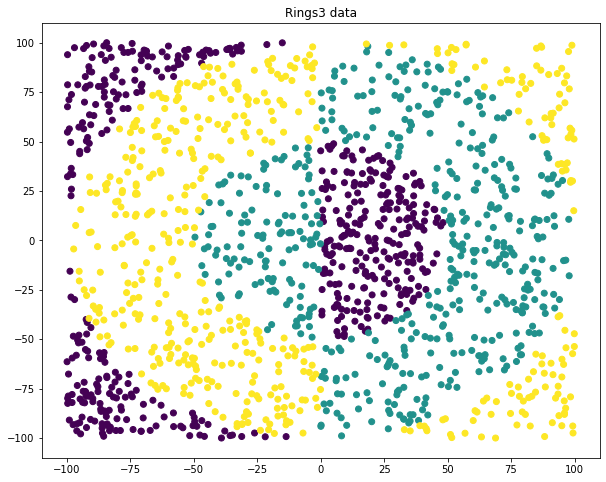

In [56]:
plt.figure(figsize=(10, 8))
plt.scatter(rings3_train['x'], rings3_train['y'], c=rings3_train['c'])
plt.title('Rings3 data')
plt.show()

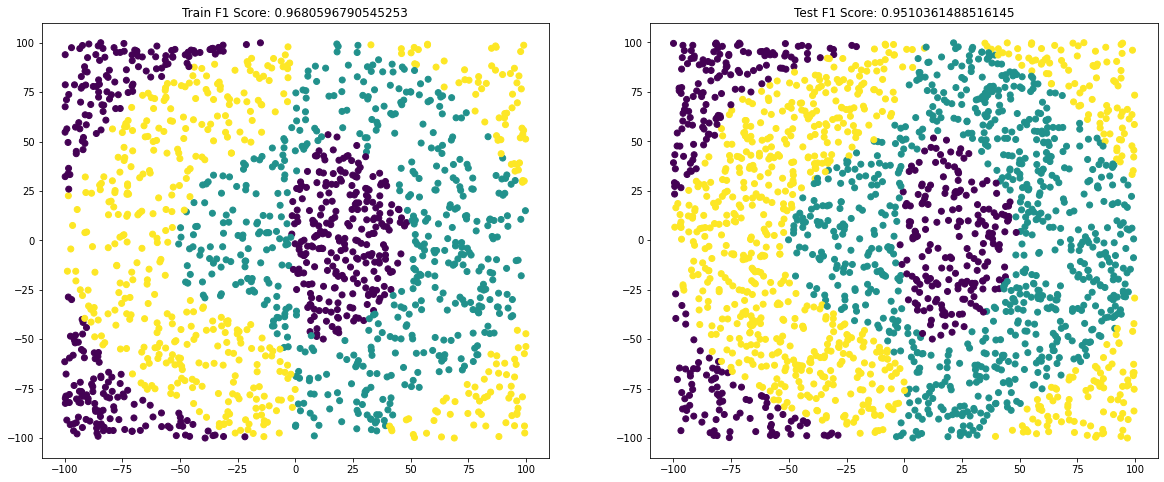

In [57]:
pred_labels_train = mlp_rings3_softmax.predict(x_rings3_train, convert_prob_to_labels=True)
pred_labels_test = mlp_rings3_softmax.predict(x_rings3_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_rings3_train[:, 0], x_rings3_train[:, 1], c=pred_labels_train)
plt.title(f'Train F1 Score: {f1_score(ylabels_rings3_train, pred_labels_train, average="macro")}')

plt.subplot(1, 2, 2)
plt.scatter(x_rings3_test[:, 0], x_rings3_test[:, 1], c=pred_labels_test)
plt.title(f'Test F1 Score: {f1_score(ylabels_rings3_test, pred_labels_test, average="macro")}')

plt.show()

### Linear

In [58]:
mlp_rings3_linear = MLP(2, [20], 3, 
                        activation_func=SigmoidActivation(),
                        out_func=LinearActivation(),
                        loss=MSE())

Epoch 500/10000 done | loss(train) = 0.59 | loss(test) = 0.56
Epoch 1000/10000 done | loss(train) = 0.40 | loss(test) = 0.40
Epoch 1500/10000 done | loss(train) = 0.38 | loss(test) = 0.39
Epoch 2000/10000 done | loss(train) = 0.38 | loss(test) = 0.39
Epoch 2500/10000 done | loss(train) = 0.37 | loss(test) = 0.39
Epoch 3000/10000 done | loss(train) = 0.35 | loss(test) = 0.37
Epoch 3500/10000 done | loss(train) = 0.33 | loss(test) = 0.35
Epoch 4000/10000 done | loss(train) = 0.34 | loss(test) = 0.35
Epoch 4500/10000 done | loss(train) = 0.31 | loss(test) = 0.34
Epoch 5000/10000 done | loss(train) = 0.28 | loss(test) = 0.30
Epoch 5500/10000 done | loss(train) = 0.25 | loss(test) = 0.27
Epoch 6000/10000 done | loss(train) = 0.22 | loss(test) = 0.25
Epoch 6500/10000 done | loss(train) = 0.21 | loss(test) = 0.23
Epoch 7000/10000 done | loss(train) = 0.19 | loss(test) = 0.21
Epoch 7500/10000 done | loss(train) = 0.19 | loss(test) = 0.21
Epoch 8000/10000 done | loss(train) = 0.18 | loss(test) 

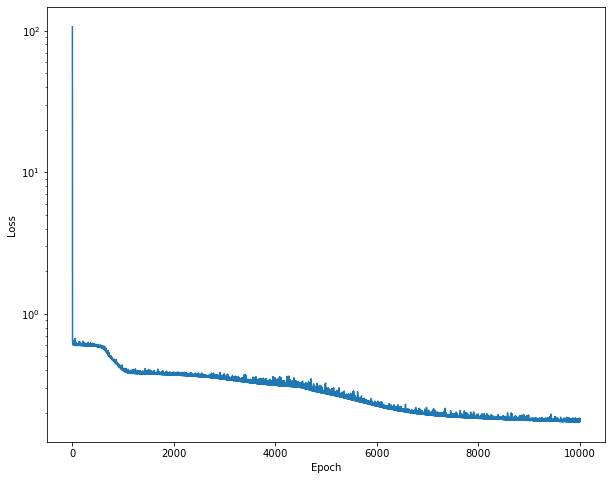

In [59]:
mlp_rings3_linear.train(
    x_rings3_train, yonehot_rings3_train, method='basic',
    x_test=x_rings3_test, y_test=yonehot_rings3_test,
    epochs=10000, learning_rate=0.1, batch_size=32, momentum_coef=0.9,
    plot_loss=True, random_state=33, verbosity_period=500,
);

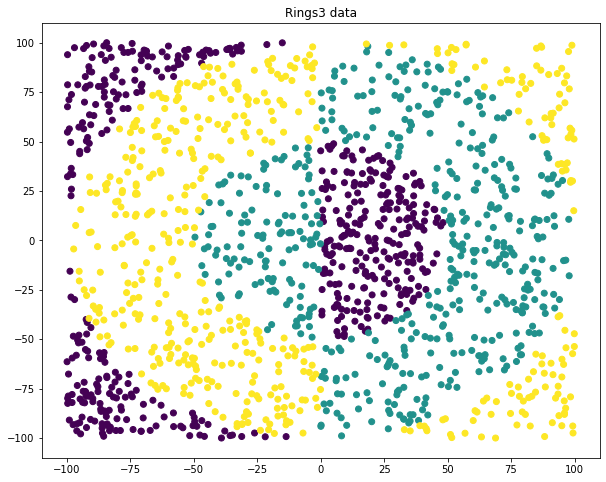

In [60]:
plt.figure(figsize=(10, 8))
plt.scatter(rings3_train['x'], rings3_train['y'], c=rings3_train['c'])
plt.title('Rings3 data')
plt.show()

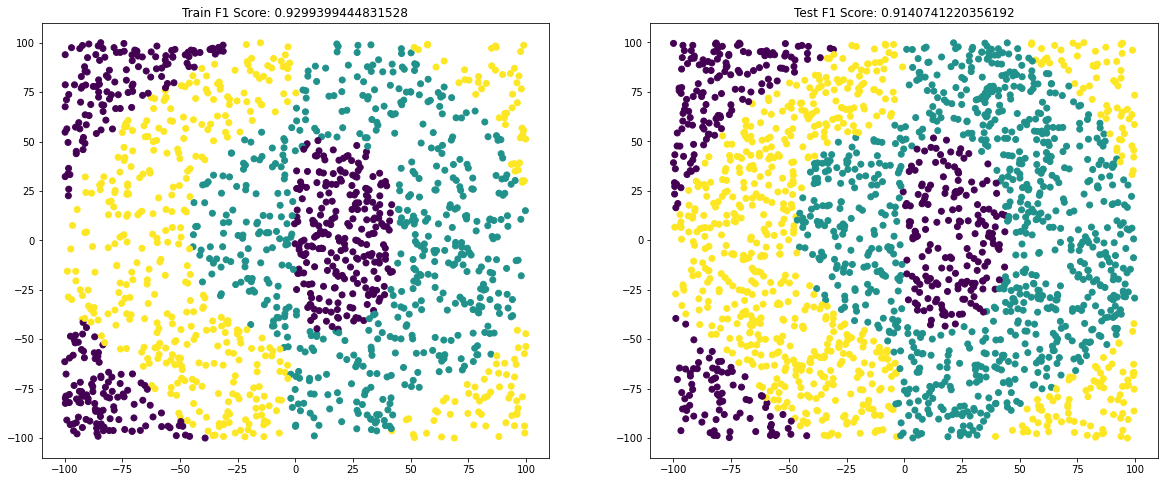

In [61]:
pred_labels_train = mlp_rings3_linear.predict(x_rings3_train, convert_prob_to_labels=True)
pred_labels_test = mlp_rings3_linear.predict(x_rings3_test, convert_prob_to_labels=True)

plt.figure(figsize=(20, 8))

plt.subplot(1, 2, 1)
plt.scatter(x_rings3_train[:, 0], x_rings3_train[:, 1], c=pred_labels_train)
plt.title(f'Train F1 Score: {f1_score(ylabels_rings3_train, pred_labels_train, average="macro")}')

plt.subplot(1, 2, 2)
plt.scatter(x_rings3_test[:, 0], x_rings3_test[:, 1], c=pred_labels_test)
plt.title(f'Test F1 Score: {f1_score(ylabels_rings3_test, pred_labels_test, average="macro")}')

plt.show()